In [27]:
from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=1, memory_limit='4GB')
client

distributed.nanny - WARNING - Worker process 30245 exited with status 1
distributed.nanny - WARNING - Worker process 30248 exited with status 1
distributed.nanny - WARNING - Worker process 30251 exited with status 1
distributed.nanny - WARNING - Worker process 30254 exited with status 1
tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/home/ouyang/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 501, in callback
    result_list.append(f.result())
  File "/home/ouyang/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/ouyang/anaconda3/lib/python3.7/site-packages/distributed/deploy/local.py", line 229, in _start_worker
    """
tornado.util.TimeoutError: Worker failed to start
tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/home/ouyang/anaconda3/lib/python3.7/site-packages/tornado/gen.py", lin

TimeoutError: Worker failed to start

In [4]:
import pandas as pd
import numpy as np

In [5]:
pokemon = pd.read_csv('data/pokemon_data.csv')

In [7]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [11]:
mask = np.random.random(pokemon.shape[0])<0.25

In [13]:
pokemon.loc[mask, :].shape[0]/pokemon.shape[0]

0.23625

In [16]:
import dask
import dask.dataframe as dd
df = dd.read_csv('data/pokemon_data.csv')

In [17]:
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
npartitions=1,,,,,,,,,,,,
,int64,object,object,object,int64,int64,int64,int64,int64,int64,int64,bool
,...,...,...,...,...,...,...,...,...,...,...,...


In [19]:
df.groupby('Type 1').HP.mean().compute()

Type 1
Bug         56.884058
Dark        66.806452
Dragon      83.312500
Electric    59.795455
Fairy       74.117647
Fighting    69.851852
Fire        69.903846
Flying      70.750000
Ghost       64.437500
Grass       67.271429
Ground      73.781250
Ice         72.000000
Normal      77.275510
Poison      67.250000
Psychic     70.631579
Rock        65.363636
Steel       65.222222
Water       72.062500
Name: HP, dtype: float64

In [1]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4, n_workers=1, memory_limit='2GB')
client

Client Scheduler: inproc://192.168.0.15/30510/1 Dashboard: http://192.168.0.15:8787/status,Cluster Workers: 1 Cores: 4 Memory: 2.00 GB


In [3]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [5]:
X, y = make_classification(n_samples=1000, random_state=0)
X[:1]

array([[-1.06377997,  0.67640868,  1.06935647, -0.21758002,  0.46021477,
        -0.39916689, -0.07918751,  1.20938491, -0.78531472, -0.17218611,
        -1.08535744, -0.99311895,  0.30693511,  0.06405769, -1.0542328 ,
        -0.52749607, -0.0741832 , -0.35562842,  1.05721416, -0.90259159]])

In [6]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
              "kernel": ['rbf', 'poly', 'sigmoid'],
              "shrinking": [True, False]}

grid_search = GridSearchCV(SVC(gamma='auto', random_state=0, probability=True),
                           param_grid=param_grid,
                           return_train_score=False,
                           iid=True,
                           cv=3,
                           n_jobs=-1)

In [7]:
grid_search.fit(X, y)

/home/ouyang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=3,
             estimator=SVC(gamma='auto', probability=True, random_state=0),
             iid=True, n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]})

In [8]:
import joblib

with joblib.parallel_backend('dask'):
    grid_search.fit(X, y)

/home/ouyang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [10]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_shrinking,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.664146,0.020312,0.067386,0.003732,0.001,rbf,True,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': True}",0.502994,0.501502,0.501502,0.502,0.000704,41
1,0.939033,0.173166,0.086351,0.007730,0.001,rbf,False,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': False}",0.502994,0.501502,0.501502,0.502,0.000704,41
2,0.537429,0.082129,0.070570,0.001661,0.001,poly,True,"{'C': 0.001, 'kernel': 'poly', 'shrinking': True}",0.502994,0.501502,0.501502,0.502,0.000704,41
3,0.662602,0.076721,0.042975,0.012619,0.001,poly,False,"{'C': 0.001, 'kernel': 'poly', 'shrinking': Fa...",0.502994,0.501502,0.501502,0.502,0.000704,41
4,1.072584,0.222803,0.085915,0.012128,0.001,sigmoid,True,"{'C': 0.001, 'kernel': 'sigmoid', 'shrinking':...",0.502994,0.501502,0.501502,0.502,0.000704,41


In [11]:
%matplotlib inline

In [12]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [27]:
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
type(X)

dask.array.core.Array

In [14]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

In [31]:
X[::10000].compute()

array([[ 1.28495607,  4.97344654],
       [ 3.6428095 ,  1.91433867],
       [ 1.97662521,  4.83579202],
       ...,
       [ 0.33398446,  1.7537672 ],
       [-2.56000581,  4.62670438],
       [ 0.74045953, -0.22595293]])

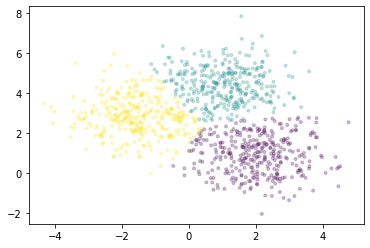

In [16]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

In [32]:
import xarray as xr

In [33]:
ds = xr.tutorial.open_dataset('air_temperature',
                              chunks={'lat': 25, 'lon': 25, 'time': -1})
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<chunksize=(2920, 25, 25), meta=np.ndarray>
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [36]:
da = ds['air']
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
dask.array<open_dataset-9ac8127b96765b9b97b9637638a644d0air, shape=(2920, 25, 53), dtype=float32, chunksize=(2920, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [38]:
da.data.compute()

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   